In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nutil import *
# plt.style.use('ggplot')
plt.style.use('dark_background')
%load_ext autoreload

%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload



## Creating signals
  https://janboone.github.io/python_economics/economics.html#org31136ad

# Ornstein-Uhlenbeck process

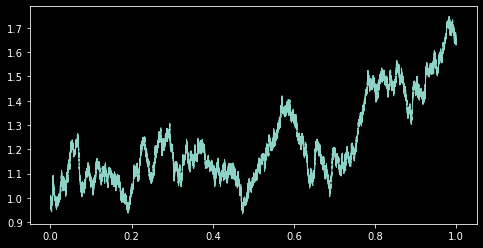

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
t,x = ou_process(dt=10**(-6), r=3)
x /= 10
ax.plot(t, x, lw=1)

SELL, BUY = -1, 1
get_stock_total = lambda agents: np.sum(list(map(lambda d: d['stock'], agents)))
get_wealth_total = lambda agents: np.sum(list(map(lambda d: d['wealth'], agents)))

get_stock_amount = lambda d: (-1)**(d['action']['type'] == SELL)*d['action']['amount']
get_volume = lambda l: np.min([np.sum((np.array(l)>0)*l), -np.sum((np.array(l)<0)*l)])
get_volume_history = lambda: list(map(lambda l: get_volume(list(map(get_stock_amount, l))), action_history))

lmap = lambda f,l: list(map(f,l))
lfilter = lambda f,l: list(filter(f,l))

get_actions = lambda agents: lfilter(lambda o: o != None, lmap(lambda a: a.get('action'), agents))
get_strat_strength = lambda s: s.strength
get_strats = lambda agents: np.squeeze(np.reshape([agent['strats'] for agent in agents], (1,-1)))

total_bought = lambda actions: np.sum(lmap(lambda d: d['amount'], filter(lambda d: d['type'] == BUY, actions)))
total_sold = lambda actions: np.sum(lmap(lambda d: d['amount'], filter(lambda d: d['type'] == SELL, actions)))
get_ts = lambda action_df: action_df[0]['timestamp']

get_bought_sold_ts = lambda action_df: (total_bought(get_actions(action_df)),total_sold(get_actions(action_df)),get_ts(action_df))

In [14]:
m = Market()

In [15]:
m.simulate_k_steps(1000)

0.00 percent done.
20.00 percent done.
40.00 percent done.
60.00 percent done.
80.00 percent done.


In [38]:
lfilter(lambda d: d.get('action').get('type') == -1 and , lfilter(lambda d: d.get('action') != None,m.action_history[7]))

[{'name': '4dee6a8c-4ea7-44f7-a00d-69b3be03a25f',
  'strats': [<strategy.Strategy at 0x7f422d78cc50>,
  'wealth': 10006.45642372009,
  'stock': 16.749134199134197,
  'timestamp': 7.000007000007e-06,
  'action': {'type': -1, 'amount': 2.0}},
 {'name': '041c1515-0f4b-4719-841f-5b8bfbc6df26',
  'strats': [<strategy.Strategy at 0x7f41e9930be0>,
  'wealth': 10006.408547327199,
  'stock': 0.0,
  'timestamp': 7.000007000007e-06,
  'action': {'type': -1, 'amount': 0.0}},
 {'name': '1ab0f011-df9f-4731-832f-a6c9a5b34c72',
  'strats': [<strategy.Strategy at 0x7f41e9b46390>,
  'wealth': 10006.432333631003,
  'stock': 9.464285714285714,
  'timestamp': 7.000007000007e-06,
  'action': {'type': -1, 'amount': 2.0}},
 {'name': '6d3432b7-a840-470e-981c-fd8b949d0908',
  'strats': [<strategy.Strategy at 0x7f41e9db0b00>,
  'wealth': 10006.394872808656,
  'stock': 0.0,
  'timestamp': 7.000007000007e-06,
  'action': {'type': -1, 'amount': 0.0}},
 {'name': 'e977b8a2-4e70-4c85-b3c9-5bd9143fc4dd',
  'strats': [<

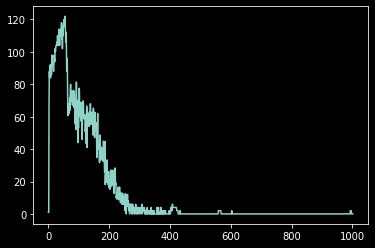

In [62]:
plt.plot(m.volume_history)

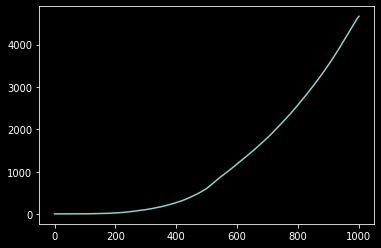

In [65]:
plt.plot(m.price_history)

In [52]:
actions0 = get_actions(m.action_history[0])

In [56]:
df = pd.DataFrame(lmap(get_bought_sold_ts, m.action_history))

In [58]:
df.columns = ['buy','sell','ts']

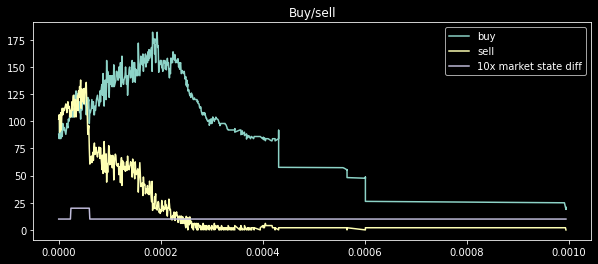

In [84]:
plt.figure(figsize=(10,4))
plt.title("Buy/sell")
plt.plot(df.ts,df.buy,label='buy')
plt.plot(df.ts,df.sell,label='sell')
plt.plot(df.ts, 10*np.sum(np.diff(m.market_state_history),axis=1),label='10x market state diff')
plt.legend(loc="upper right")

In [83]:
np.sum(np.diff(m.market_state_history),axis=1)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [78]:
np.diff(m.market_state_history).shape

(1000, 93)

## Visualisation tools

How to investigate:

- single timestamp
    - how many buyers / sellers
    - how many active strategies
    - how difficult strategies
- single agent
    - how many active strategies
    - profit
- single strategy
    - strength
    - potential profit (if always chosen) ~ already directly correlated to strength?
    
### TODO:

If multiple strats active, don't have stocks/liquidity -> only buy/

In [8]:
lmap(get_strat_strength, get_strats(m.action_history[0]))[301]

0.05

In [10]:
pd.Series(list(map(lambda d: str(d.keys()), m.action_history[-1]))).value_counts()

dict_keys(['name', 'strats', 'wealth', 'stock', 'timestamp', 'action'])    46
dict_keys(['name', 'strats', 'wealth', 'stock', 'timestamp'])               4
dtype: int64

In [11]:
bs = get_strats(m.agents)[1489]

In [78]:
v = lmap(lambda s: np.sum(lmap(s.is_activated, m.market_state_history)), get_strats(m.agents))

In [80]:
pd.Series(v).value_counts() # absolutely no changes to strats

0       2305
1210     195
dtype: int64

In [63]:
np.argsort(lmap(get_strat_strength, get_strats(m.agents)))

array([2430, 2188,  779, ...,  301,   38, 1844])

In [154]:
pd.DataFrame(lfilter(lambda d: d.get('action') != None and d.get('action').get('amount') != 0.,m.action_history[-1]))

,name,strats,wealth,stock,timestamp,action
0,1701ef8f-9e27-4a59-a6ea-c2ecb85ebcd7,[---\nMarket indicators: [ 1 5 8 13 15 22 26...,10026.645538,30.158938,0.000031,"{'type': 1, 'amount': 0.998888180741205}"
1,55258d0d-b9d0-43b1-b300-2d23d1a70b52,[---\nMarket indicators: [ 1 2 5 7 9 11 15...,10026.645538,30.158938,0.000031,"{'type': 1, 'amount': 0.998888180741205}"
2,ab1f1586-c486-4307-be5a-701404f7d3c6,[---\nMarket indicators: [13 16 18 21 23 28 34...,10025.856885,3.004313,0.000031,"{'type': 1, 'amount': 0.998888180741205}"
3,e0a0743a-0ac1-415e-9d75-931009093eb9,[---\nMarket indicators: [ 2 3 5 6 9 11 12...,10026.645538,30.158938,0.000031,"{'type': 1, 'amount': 0.998888180741205}"
4,d1eb06bf-9ccf-44ef-b77f-290ba3fb4311,[---\nMarket indicators: [ 0 2 3 6 8 11 15...,10019.118996,19.372393,0.000031,"{'type': 1, 'amount': 0.998888180741205}"
5,b0d10741-2ba5-47ee-9aaf-c69601d7bcfc,[---\nMarket indicators: [ 0 2 4 5 6 7 8...,10025.790867,2.323497,0.000031,"{'type': 1, 'amount': 0.998888180741205}"
6,7cef3ee7-e82c-4261-b71d-552f4222473e,[---\nMarket indicators: [ 1 2 3 4 7 12 16...,10025.749417,1.205231,0.000031,"{'type': -1, 'amount': 1}"
7,d34c6b7c-5644-4ab3-9982-c2315cddc601,[---\nMarket indicators: [ 3 4 6 7 8 9 10...,10026.561142,28.373224,0.000031,"{'type': 1, 'amount': 0.998888180741205}"
8,00e004a9-e408-4b6b-a526-4153b878dc49,[---\nMarket indicators: [ 0 1 2 3 4 5 6...,10026.645538,30.158938,0.000031,"{'type': 1, 'amount': 0.998888180741205}"
9,77ac5e09-342d-4893-91a6-dccde0afb11c,[---\nMarket indicators: [ 4 11 18 20 55 63 82...,10026.645538,30.158938,0.000031,"{'type': 1, 'amount': 0.998888180741205}"


In [ ]:
allstrats = np.reshape(np.c_[lmap(lambda a: a['strats'], fa)], 4000)

In [ ]:
lfilter(lambda s: s.strength>0.8 and s.is_activated(market_state), allstrats)

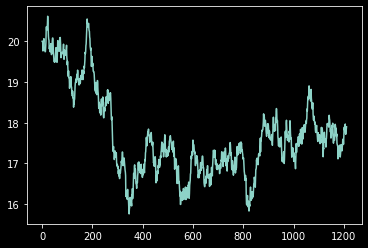

In [77]:
# plt.plot(m.price_history, label='Price')
# plt.plot(np.array(m.volume_history)*2, label='Volume')
plt.plot(np.array(m.dividend_history)*20, label='Dividend')